In [3]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.datasets import fetch_mldata

In [11]:
mnist = fetch_mldata('MNIST original', data_home='.\dataset')

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
# 特徴量と目的変数に分割
X, y = mnist['data'], mnist['target']

In [13]:
type(mnist)

sklearn.utils.Bunch

In [14]:
test_number = X[53238]

In [15]:
test_number_image = test_number.reshape(28, 28)

In [16]:
pd.options.display.max_columns = 28

In [17]:
number_matrix = pd.DataFrame(test_number_image)

In [18]:
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,70,70,112,229,229,161,161,161,162,65,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,22,230,254,253,253,253,254,253,253,253,254,249,222,105,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,24,253,254,253,242,137,138,188,196,246,254,253,253,253,119,0,0,0,0,0,0,0
8,0,0,0,0,0,0,24,253,254,219,63,0,0,0,0,50,120,253,253,253,184,0,0,0,0,0,0,0
9,0,0,0,0,0,0,9,185,255,254,144,69,0,0,0,0,95,254,254,254,102,0,0,0,0,0,0,0


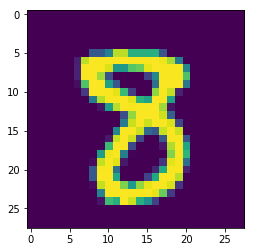

In [20]:
plt.imshow(test_number_image)

In [21]:
y[53238]

8.0

In [22]:
%matplotlib inline

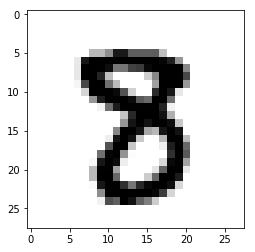

In [25]:
plt.imshow(test_number_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [26]:
# 訓練データとテストデータに分割
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [27]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [28]:
# 28 * 28 * 1 にサイズ変換
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
# データタイプ変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [32]:
# 255 で割って正規化
X_train /= 255
X_test /= 255

In [33]:
# ターゲット（ 0 ～ 9 ) をカテゴリカル変数に変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [34]:
y_test[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
# モデル作成
model = Sequential()

In [41]:
# レイヤーを追加
# 畳み込み層
model.add(Conv2D(32, kernel_size=(3, 3), 
                 activation='relu',
                 input_shape=(28, 28, 1)))
# プーリング層
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアウト
model.add(Dropout(0.25))
model.add(Flatten())
# 活性化関数
model.add(Dense(128, activation='relu'))
# 出力層
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [45]:
# モデルコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [46]:
# モデルの訓練 10 エポック
model.fit(X_train, y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 41s 675us/step - loss: 0.5056 - accuracy: 0.8558
Epoch 2/10
60000/60000 [==============================] - 34s 564us/step - loss: 0.2469 - accuracy: 0.9260
Epoch 3/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.1884 - accuracy: 0.9427
Epoch 4/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.1543 - accuracy: 0.9540
Epoch 5/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.1333 - accuracy: 0.9595
Epoch 6/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.1164 - accuracy: 0.9653
Epoch 7/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.1022 - accuracy: 0.9697
Epoch 8/10
60000/60000 [==============================] - 34s 568us/step - loss: 0.0916 - accuracy: 0.9723
Epoch 9/10
60000/60000 [==============================] - 34s 570us/step - loss: 0.0843 - accura

In [47]:
# テストデータで評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

10000/10000 [==============================] - 3s 269us/step


In [48]:
loss_and_metrics

[0.0655470386147499, 0.9783999919891357]

In [49]:
# テストデータで予測
predictions = model.predict_classes(X_test)

In [51]:
x = list(predictions)
y = list(y[60000:])

In [52]:
results = pd.DataFrame({'Actual': y, 'Predictions': x})

In [53]:
results[:10]

,Actual,Predictions
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


In [54]:
results[9990:]

,Actual,Predictions
9990,9.0,9
9991,9.0,9
9992,9.0,9
9993,9.0,9
9994,9.0,9
9995,9.0,9
9996,9.0,9
9997,9.0,9
9998,9.0,9
9999,9.0,9
